b'[0, -1]\n[0, 1]\n[-1, 0]\n[1, 0]\n[0, -2]\n[0, 2]\n[-2, 0]\n[2, 0]\n[0, -4]\n[0, 4]\n[-4, 0]\n[4, 0]\n[0, -8]\n[0, 8]\n[-8, 0]\n[8, 0]\n[0, -16]\n[0, 16]\n[-16, 0]\n[16, 0]\nLoading bricks datax,y,t,p,vx_perp,vy_perp\ndone..\nWork took 0.137561 seconds for 10 K events (num_thread: 64)\nSaving datadone..'
0
(208, 272, 2)


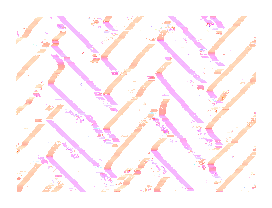

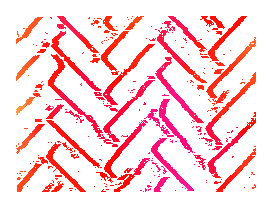

In [62]:
import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

bin0_path = 'result/flo0.bin'
bin1_path = 'result/flo1.bin'
png0_path = 'result/flo0.png'
png1_path = 'result/flo1.png'
W, H, C = 272,208, 2
run_cpp= True

if run_cpp:
    # res = command.run(['rm', png0_path]) 
    # res = command.run(['rm', bin0_path]) 
    # res = command.run(['rm', png1_path]) 
    # res = command.run(['rm', bin1_path]) 
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

flo0 = np.fromfile(bin0_path, dtype=np.float64) 
flo0 = flo0.reshape([H,W,C])

flo1 = np.fromfile(bin1_path, dtype=np.float64) 
flo1 = flo1.reshape([H,W,C])
print(flo0.shape)

flow_vis.save_flo(flo0, png0_path)
flow_vis.save_flo(flo1, png1_path)
display(Image(filename=png1_path)) 
display(Image(filename=png0_path)) 